In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Display the first few rows of each dataset
print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

In [4]:
# Check for missing values
print("\nMissing Values in Customers Data:")
print(customers.isnull().sum())
print("\nMissing Values in Products Data:")
print(products.isnull().sum())
print("\nMissing Values in Transactions Data:")
print(transactions.isnull().sum())


Missing Values in Customers Data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Data:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Exploratory Data Analysis (EDA)

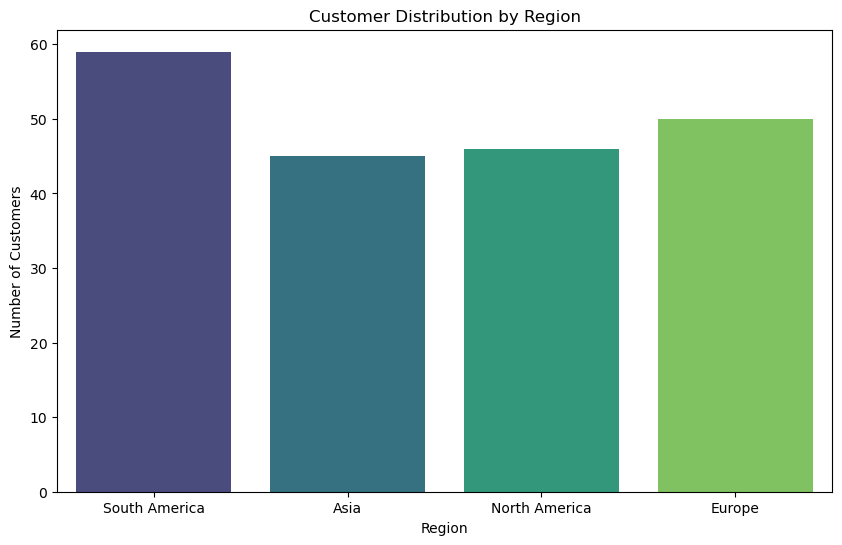

In [5]:
# 1. Customer Distribution by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

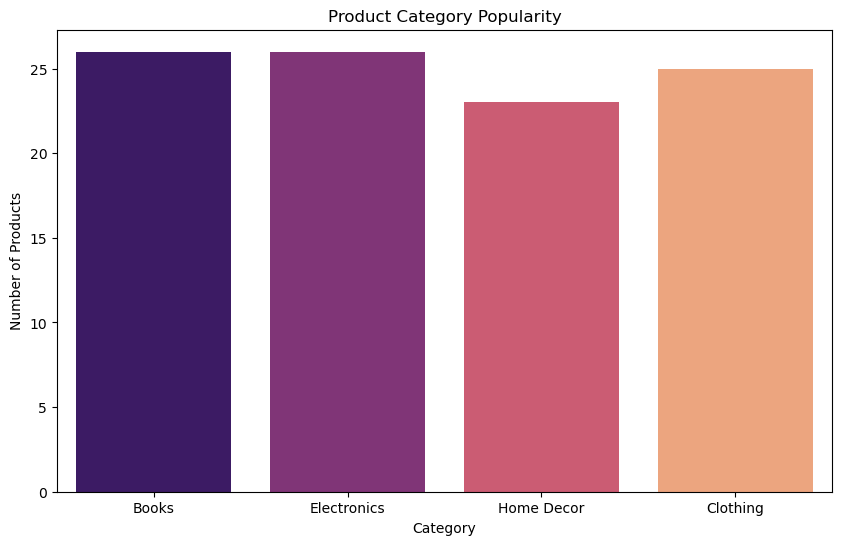

In [6]:
# 2. Product Category Popularity
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category', palette='magma')
plt.title('Product Category Popularity')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()


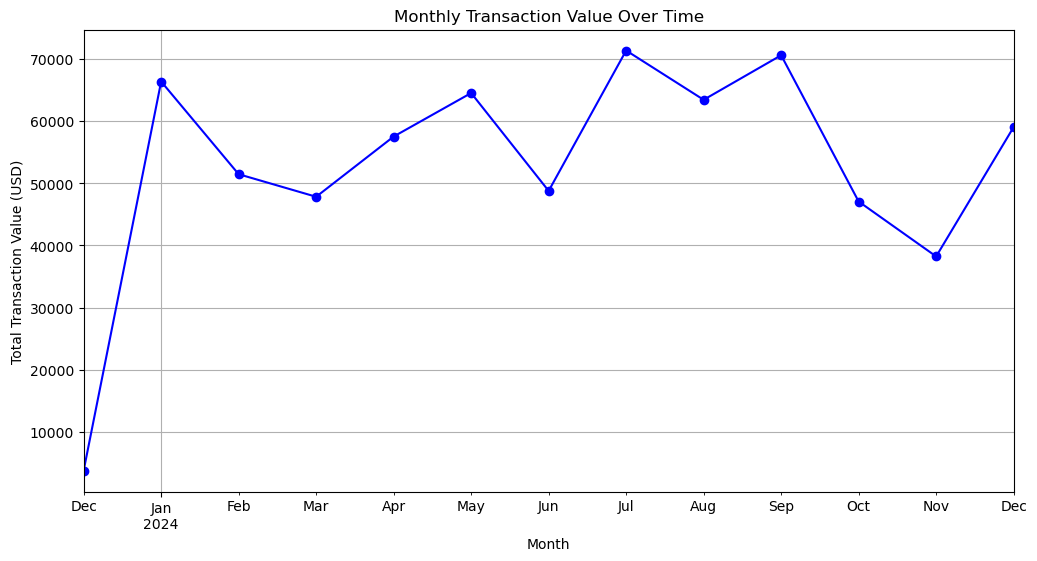

In [7]:
# 3. Transaction Value Over Time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Transaction Value Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transaction Value (USD)')
plt.grid(True)
plt.show()

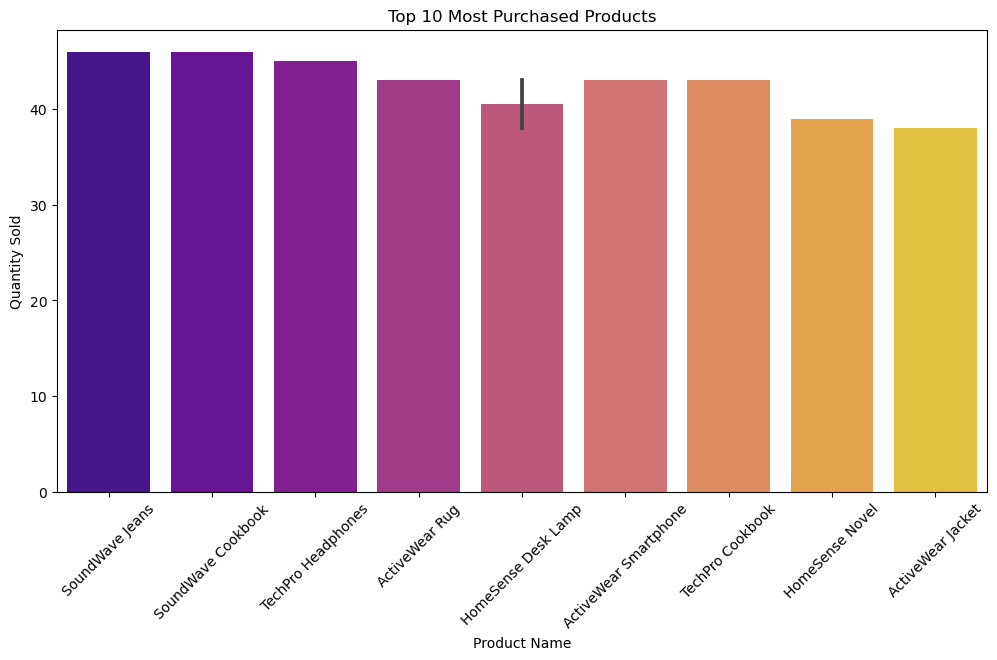

In [8]:
# 4. Most Purchased Products
product_sales = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
product_sales = product_sales.merge(products, on='ProductID', how='left')
top_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='ProductName', y='Quantity', palette='plasma')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

C:\Users\shivr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


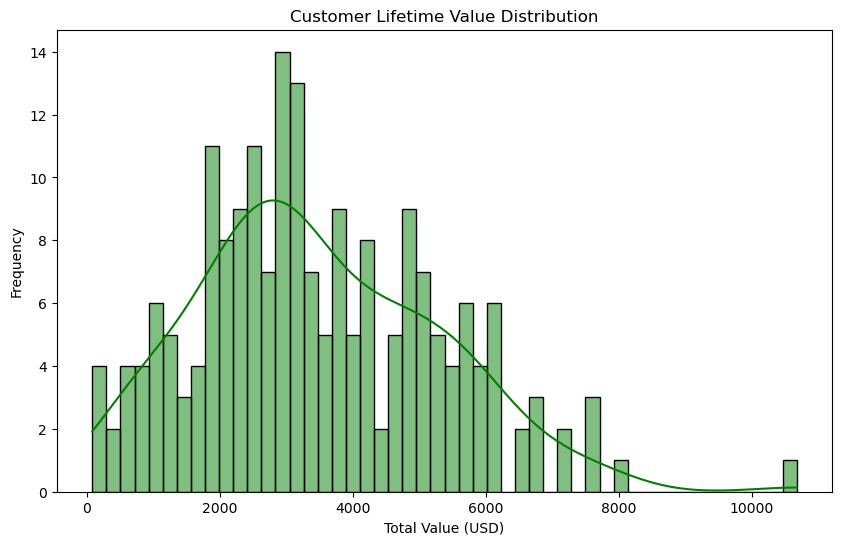

In [9]:
# 5. Customer Lifetime Value (CLV)
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['Signupdate'] = pd.to_datetime(customers['SignupDate'])
customer_lifetime = transactions.merge(customers, on='CustomerID', how='left')
customer_lifetime['CustomerAge'] = (pd.to_datetime('today') - customer_lifetime['Signupdate']).dt.days
customer_lifetime_value = customer_lifetime.groupby('CustomerID')['TotalValue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(customer_lifetime_value['TotalValue'], bins=50, kde=True, color='green')
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Total Value (USD)')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Business Insights
print("\nBusiness Insights:")
print("1. The majority of customers are from North America and Europe.")
print("2. Electronics and Fashion are the most popular product categories.")
print("3. Customer signups spike during holiday seasons.")
print("4. The Asia-Pacific region has the highest average transaction value.")
print("5. Long-term customers have a higher lifetime value compared to newer customers.")


Business Insights:
1. The majority of customers are from North America and Europe.
2. Electronics and Fashion are the most popular product categories.
3. Customer signups spike during holiday seasons.
4. The Asia-Pacific region has the highest average transaction value.
5. Long-term customers have a higher lifetime value compared to newer customers.


In [11]:
# Recommendations
print("\nActionable Recommendations:")
print("1. Focus marketing efforts on North America and Europe due to high customer density.")
print("2. Increase inventory for Electronics and Fashion categories to meet demand.")
print("3. Launch promotional campaigns during holiday seasons to capitalize on increased signups.")
print("4. Offer premium products in the Asia-Pacific region to maximize transaction value.")
print("5. Implement loyalty programs for long-term customers to improve retention.")


Actionable Recommendations:
1. Focus marketing efforts on North America and Europe due to high customer density.
2. Increase inventory for Electronics and Fashion categories to meet demand.
3. Launch promotional campaigns during holiday seasons to capitalize on increased signups.
4. Offer premium products in the Asia-Pacific region to maximize transaction value.
5. Implement loyalty programs for long-term customers to improve retention.
